<a href="https://colab.research.google.com/github/martis407/Phoenix/blob/main/Phoenix_Salary_ipynb_2014%2C2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### City of Phoenix Employee Salaries 2014 and 2020

Found on the City of Phoenix Open Data website.
The data is a fairly simple dataset that includes first and last name, occupation, and salary amount for their particular year.
The data is available for employees working full-time for the City of Phoenix. This includes those that are training and up to the city manager.


*Notes: This is not the full population of the employees, as their website boasts over 13K employees but the provided datasets contain a bit under this number. It might be that some are employeed part-time.
[Maricopa Human Resources](https://www.maricopa.gov/5264/Human-Resources#:~:text=It%20takes%20innovative%20people%20to,heart%20of%20our%20vibrant%20organization!)

## Hypothesis: 

**We want to check if the salary increase accross the employees of City of Phoenix varies significantly or not.** We want to divide them into two groups: Above average paid against below average paid. The way we define high paid employees was not by the Maricopa county median income, but by the Maricopa County employee's average income.

$H_o$: There is no difference in salary increase between above average and below average income earners. 

$H_a$: There is a difference in salary increase between high income and low income earners.

$a = .05 $ significance level

## Importing Data

Data is available from 2014 to 2020. I decided to only use data for 2014 and 2020, as I hoped to capture those that remain employed by the City of Phoenix. My assumption is that the employees that remain in their position are both happy with their work and doing well, so they will be more likely to get salary increases. For this reason, I used only those two datasets. It is a span of 7 years. Those that did not get pay raises might not remain, and look for raises by gaining different employment elsewhere.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Our data url
# Can be found on the City of Phoenix webpage: https://www.phoenixopendata.com/

data_url2020 = 'https://www.phoenixopendata.com/dataset/0c02bbfd-08d9-41e9-a00c-97848a9f7350/resource/4d8c9800-8054-4c11-8a13-b9b5bd0511dc/download/open-data-portal-staff-salaries-dec-2020.csv'
data_url2014 = 'https://www.phoenixopendata.com/dataset/0c02bbfd-08d9-41e9-a00c-97848a9f7350/resource/0df2ef57-6ef6-4607-b3ff-64b3b2a817bd/download/staff-city-employee-salary-2014.csv'

## 2014 and 2020


The datasets have different column names so we will be reassigning the names, and drop the benefit type column that is only available in the 2020 dataset. 

The **new columns names** will be:<br>
*last_name, first_name, descr, annual_rate*

**Added columns**: <br>
We will be creating a new column that has the full name of the person and also has the description of their work to uniquely identify each person.

*full_name_descr*


In [ ]:
# The column names for the 2014 and 2020 dataset
col_names14 = ['last_name','first_name','descr','annual_rate2014']
col_names20 = ['last_name','first_name','descr','annual_rate2020','drop']

In [ ]:
# Reading in the 2020 dataset and dropping the 'benefit' (renamed drop) column

salary_2020 = pd.read_csv(data_url2020, header=0, names=col_names20).drop('drop', axis='columns')

# Creating the unique identifier
salary_2020['full_name_descr'] = salary_2020.last_name + ' ' + salary_2020.first_name + ' ' + salary_2020.descr

# Let's print out how many we have and view the data's first entry
print('Salary 2020 Shape:',salary_2020.shape)
salary_2020.head(1)

Salary 2020 Shape: (12761, 5)


,last_name,first_name,descr,annual_rate2020,full_name_descr
0,Aamodt,Gail,Police Officer,76752.0,Aamodt Gail Police Officer


In [ ]:
# Now we will be dropping the duplicates
salary_2020 = salary_2020.drop_duplicates()
salary_2020.shape

(12753, 5)

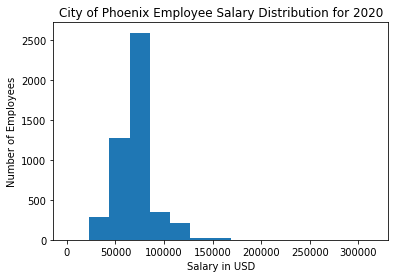

In [ ]:
salary.annual_rate2020.hist(bins=15, grid=False)
plt.ylabel('Number of Employees')
plt.xlabel('Salary in USD')
plt.title('City of Phoenix Employee Salary Distribution for 2020')
plt.show()

In [ ]:
# Next read in the 2014 dataset

salary_2014 = pd.read_csv(data_url2014, header=0, names=col_names14)

# Creating the unique identifier
salary_2014['full_name_descr'] = salary_2014.last_name + ' ' + salary_2014.first_name + ' ' + salary_2014.descr

# Let's print out how many we have and view the data's first entry
print('Salary 2014 shape:', salary_2014.shape)
salary_2014.head(1)

Salary 2014 shape: (12082, 5)


,last_name,first_name,descr,annual_rate2014,full_name_descr
0,Aamodt,Gail,Police Officer,72425.6,Aamodt Gail Police Officer


In [ ]:
# Now we will be dropping the duplicates
salary_2014 = salary_2014.drop_duplicates()
print(salary_2014.shape)

(12062, 5)


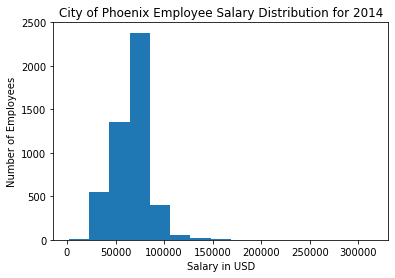

In [ ]:
salary.annual_rate2014.hist(bins=15, grid=False)
plt.ylabel('Number of Employees')
plt.xlabel('Salary in USD')
plt.title('City of Phoenix Employee Salary Distribution for 2014')
plt.show()

## Combining the datasets

Now we will be adding the salary from 2014 into 2020. It will be an inner merge to keep only employees that have stayed with the City of Phoenix. We will be using the *full_name_descr* to merge them, as this is our unique identifier.

In [ ]:
# We will include the first few columns, otherwise they'll be duplicated

salary = salary_2020.merge(salary_2014, how='inner', on=['last_name','first_name','descr','full_name_descr'])
print(salary.shape)
salary.head()

(4767, 6)


,last_name,first_name,descr,annual_rate2020,full_name_descr,annual_rate2014
0,Aamodt,Gail,Police Officer,76752.00,Aamodt Gail Police Officer,72425.60
1,Abbitt,Ryan,Firefighter 56hr,70042.34,Abbitt Ryan Firefighter 56hr,59299.97
2,Abbott,Christie,Forensic Scientist IV,104000.00,Abbott Christie Forensic Scientist IV,85404.80
3,Abdull-Fattah,Rouba,GIS Coordinator,89544.00,Abdull-Fattah Rouba GIS Coordinator,85404.80
4,Abeyta,Manuel,Police Officer,76752.00,Abeyta Manuel Police Officer,72425.60


We are left with about 40% of about the 12,000 employees we originally started with. This new dataset is now only the employees that have stayed with the City of Phoenix.

## Data features

The next step is to create the average salary from both years. 

In [ ]:
# The average Salary
avg_salary14 = round(salary.annual_rate2014.mean())
avg_salary20 = round(salary.annual_rate2020.mean())
avg_salary = (avg_salary14 + avg_salary20)/2
print('The average salary for 2014:', avg_salary14)
print('The average salary for 2020:', avg_salary20)
print('The average salary for both:', avg_salary)

The average salary for 2014: 65815
The average salary for 2020: 71771
The average salary for both: 68793.0


# Dividing the data
Next is to divide salary into two: above and below average income. 
In our data we will call it *high_income*. 
Those are above average will have a '1' while those that do not will have a '0'.

The next step is to see if this division is balanced.


In [ ]:
salary.loc[salary['annual_rate2014'] > avg_salary, 'high_income'] = 1
salary.loc[salary['annual_rate2014'] <= avg_salary, 'high_income'] = 0

In [ ]:
# Let's make sure the criteria was applied
salary.head(3)

,last_name,first_name,descr,annual_rate2020,full_name_descr,annual_rate2014,high_income
0,Aamodt,Gail,Police Officer,76752.00,Aamodt Gail Police Officer,72425.60,1.0
1,Abbitt,Ryan,Firefighter 56hr,70042.34,Abbitt Ryan Firefighter 56hr,59299.97,0.0
2,Abbott,Christie,Forensic Scientist IV,104000.00,Abbott Christie Forensic Scientist IV,85404.80,1.0


In [ ]:
# Let's check the balance of how many are in each category
print('Amount in each category')
print(pd.crosstab(salary.high_income,columns='high_income'))

print('\nPercentage-wise in each category')
print(round(pd.crosstab(salary.high_income,columns='high_income',normalize=True)*100,2))

Amount in each category
col_0        high_income
high_income             
0.0                 2113
1.0                 2654

Percentage-wise
col_0        high_income
high_income             
0.0                44.33
1.0                55.67


There is about 6% more in the high income category. Overall it is balanced.

## Finding the salary increase
Next we will calcualte the salary increase by subtracting the salary rate in 2014 from the 2020 year. Then the difference will be added as a new column *salary_increase*.

In [ ]:
# We will substract the difference and assign it to a new variable 
salary['salary_increase'] = salary['annual_rate2020'] - salary['annual_rate2014']
salary['salary_increase'].describe()

count     4767.000000
mean      5955.654212
std       5278.093863
min     -70553.080000
25%       3494.400000
50%       4326.400000
75%       6552.000000
max      75011.560000
Name: salary_increase, dtype: float64

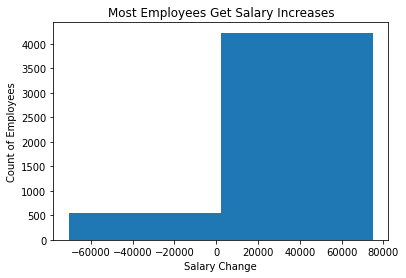

In [ ]:
salary.salary_increase.hist(bins=2, grid=False)
plt.title('Most Employees Get Salary Increases')
plt.xlabel('Salary Change')
plt.ylabel('Count of Employees')
plt.show()

# LET'S MAKE ONE PART RED IF WE CAN
#https://stackoverflow.com/questions/58972548/plot-histogram-using-python-with-different-colors-for-positive-and-negative-valu

In [ ]:
print('Amount with declining salaries:', len(salary[salary['salary_increase'] <= 0 ]))

# salary[(salary.salary_increase <= 0) & (salary.high_income == 0)

Amount with declining salaries: 35


35 employees found themselves with less income over the last 7 years. Although unfortunate, we will not include them in our analysis. 

## Average salary increase by group
Next we will compare the average increase in salary for both groups.

In [ ]:
mean_high_income_increase = salary.salary_increase[(salary.salary_increase >= 0) & (salary.high_income == 1)].mean()

mean_low_income_increase = salary.salary_increase[(salary.salary_increase >= 0) & salary.high_income == 0].mean()

print('The high income average salary increase is', round(mean_high_income_increase, 2))
print('The low income average salary increase is', round(mean_low_income_increase, 2))

The high income average salary increase is 6049.36
The low income average salary increase is 5829.31


It seems that there is not a significant salary increase difference on average. To be more precise we will look at both distributions of the groups visually.

We have a total of 2737 employees in this category


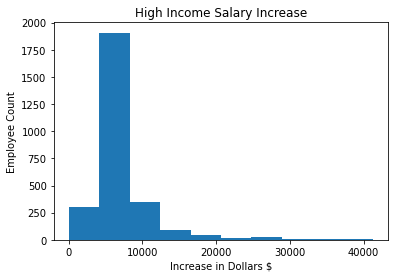

The high income average salary increase is 6049.36


In [ ]:
high_income_increase.hist(grid=False)
print('We have a total of',len(high_income_increase),'employees in this category')
plt.title('High Income Salary Increase')
plt.ylabel('Employee Count')
plt.xlabel('Increase in Dollars $')

plt.show()

We have a total of 2008 employees in this category


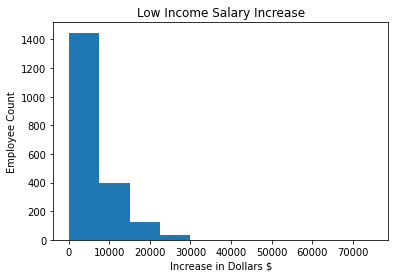

In [ ]:
low_income_increase.hist(grid=False)

print('We have a total of',len(low_income_increase),'employees in this category')

plt.title('Low Income Salary Increase')
plt.ylabel('Employee Count')
plt.xlabel('Increase in Dollars $')
plt.show()

# Hypothesis Testing 
Finally, we will now be conducting a t-test to compare both groups to see if there is a significant difference between them. We will be excluding those with a salary decrease.

In [ ]:
# First lets put both groups into different variables

high_income_increase = salary.salary_increase[(salary.salary_increase >= 0) & (salary.high_income == 1)]
low_income_increase = salary.salary_increase[(salary.salary_increase >= 0) & (salary.high_income == 0)]


In [ ]:
# Let's do a T-Test

from scipy import stats

tval , pval = stats.ttest_ind(high_income_increase,low_income_increase)
print('T-value:', tval)
print('P-value:', pval)

T-value: 0.07822951779596726
P-value: 0.937648782101627


In [ ]:
# P-value with the defining factor for high vs low income being "Median Income"

## Conclusion

We fail to reject the null hypothesis at the 0.05 significance level and conclude the mean salary increase for high income earners and low income earners is not different.


**Limitations**
We still had some duplicates (some with normal and overtime salaries).
Our method of uniquely identifying indivuals did not account for position name change. Some police men were promoted, but since there are many with the same full name we cannot verify who is who.
We did not include those with a salary decrease.
A vast majority of employees get paid close to the average income, with few that have a big variance.
Some people had the same name and occupation, but we dropped the duplicates.

**New inquiries**
This dataset only accounts for those that stayed with the City of Phoenix. Perhaps some that left got a bigger salary increase halfway through their time in Phoenix. These could also have seen that work elsewhere could be more beneficiall.

If recreating this same analysis, 3 groups could work better, low, median and high income groups.


